In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import r_regression
import seaborn as sns

In [2]:
# load utilities

%run ./utility/utilities.py

In [3]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.12.2
ipykernel        : 6.29.5
ipywidgets       : 8.1.3
jupyter_client   : 8.6.2
jupyter_core     : 5.7.2
jupyter_server   : 2.7.0
jupyterlab       : 4.2.3
nbclient         : 0.10.0
nbconvert        : 7.16.4
nbformat         : 5.10.4
notebook         : 7.2.1
qtconsole        : 5.5.2
traitlets        : 5.14.3


## loading de-identified data

In [4]:
# (B001 - B131) 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

# load data
data = pd.read_excel('data/BladderCancer_132P_TIL_prd1.xlsx')
data = data.loc[0:130]

Ndata = data[['ID','Surgeon','Age_at_Surgery','Race','Surgery','Smoker','BMI',\
              'NAC','cT','pT','cT_or_pT','pN','Bx_Histology','Histology',\
              'Sample_weight_g_tumor','Tumor_digest_count_primary_tumor','Number_of_fragments_plated_tumor',\
              'Overall_TIL_growth']].copy()

Ndata = Ndata.replace(to_replace="Yes",value="Yes TIL")
Ndata = Ndata.replace(to_replace="No",value="No TIL")

Ndata = Ndata.replace(r'^\s*$', np.nan, regex=True) # Replace Blank values with DataFrame.replace() methods.

Extracted_col0 = Ndata.iloc[:,0:1]  # "ID"
Extracted_col1 = Ndata['Surgeon'];                           Extracted_col2 = Ndata['Age_at_Surgery']
Extracted_col3 = Ndata['Race'];                              Extracted_col4 = Ndata['Surgery']
Extracted_col5 = Ndata['Smoker'];                            Extracted_col6 = Ndata['BMI']
Extracted_col7 = Ndata['NAC'];                               Extracted_col8 = Ndata['cT']
Extracted_col9 = Ndata['pT'];                                Extracted_col10 = Ndata['cT_or_pT']
Extracted_col11 = Ndata['pN'];                               Extracted_col12 = Ndata['Bx_Histology']
Extracted_col13 = Ndata['Histology'];                        Extracted_col14 = Ndata['Sample_weight_g_tumor']
Extracted_col15 = Ndata['Tumor_digest_count_primary_tumor']; Extracted_col16 = Ndata['Number_of_fragments_plated_tumor']
Extracted_col17 = Ndata['Overall_TIL_growth']

ndata_sel = Extracted_col0
ndata_sel = ndata_sel.join(Extracted_col1); ndata_sel = ndata_sel.join(Extracted_col2)
ndata_sel = ndata_sel.join(Extracted_col3); ndata_sel = ndata_sel.join(Extracted_col4)
ndata_sel = ndata_sel.join(Extracted_col5); ndata_sel = ndata_sel.join(Extracted_col6)
ndata_sel = ndata_sel.join(Extracted_col7); ndata_sel = ndata_sel.join(Extracted_col8)
ndata_sel = ndata_sel.join(Extracted_col9); ndata_sel = ndata_sel.join(Extracted_col10)
ndata_sel = ndata_sel.join(Extracted_col11); ndata_sel = ndata_sel.join(Extracted_col12)
ndata_sel = ndata_sel.join(Extracted_col13); ndata_sel = ndata_sel.join(Extracted_col14)
ndata_sel = ndata_sel.join(Extracted_col15); ndata_sel = ndata_sel.join(Extracted_col16)
ndata_sel = ndata_sel.join(Extracted_col17)

ndata_sel = ndata_sel.rename(columns={'Overall_TIL_growth': 'OverallTILGrowth'})

Cols = ['Surgeon','Age at Surgery','Race','Surgery','Smoker','BMI',\
        'NAC','cT','pT','cT or pT','pN','Bx Histology','Histology',\
        'Sample weight (g) tumor','Tumor digest count (primary tumor)','Number of fragments plated (tumor)',\
        'OverallTILGrowth']

feats = ['Surgeon','Age at Surgery','Race','Surgery','Smoker','BMI',\
        'NAC','cT','pT','cT or pT','pN','Bx Histology','Histology',\
        'Sample weight (g) tumor','Tumor digest count (primary tumor)','Number of fragments plated (tumor)']

feat_labels = feats

In [5]:
# print(ndata_sel)
print(ndata_sel.shape)

(131, 18)


## check corelation of each of the 16 features with 'Overall TIL Growth'

In [6]:
# corelation feature and target

ndata_sely = ndata_sel

ndata_sely.dropna(inplace=True) # drop rows with Nan, no entries
print(ndata_sely.shape)

X_cor = ndata_sely.drop('OverallTILGrowth', axis=1)
X_cor = X_cor.drop('ID', axis=1)

ndata_sely = ndata_sely.replace(to_replace='Yes TIL',value='1')
ndata_sely = ndata_sely.replace(to_replace='No TIL',value='-1')

# convert column "OverallTILGrowth" of Ndata to numerics
ndata_sely['OverallTILGrowth'] = pd.to_numeric(ndata_sely['OverallTILGrowth'])
y_cor = ndata_sely['OverallTILGrowth']


# print(y_cor)
# print(X_cor)

feat_cols = list(X_cor.columns)

feat_cor_targ = r_regression(X_cor, y_cor, center=True, force_finite=True)
feat_cor_targ = list(feat_cor_targ)

# print(feat_cols)
# print(feat_cor_targ)

print("Corelation with OverallTILGrowth")
for feature in zip(feat_cols, feat_cor_targ):
    print(feature)



(60, 18)
Corelation with OverallTILGrowth
('Surgeon', -0.19253619470127653)
('Age_at_Surgery', 0.012570876136093059)
('Race', -0.2244429163603886)
('Surgery', inf)
('Smoker', -0.06916709201019779)
('BMI', -0.08798707993577401)
('NAC', -0.1848502814539359)
('cT', 0.31394487853242575)
('pT', 0.11787983549670639)
('cT_or_pT', 0.2705156452369652)
('pN', -0.0741880123448742)
('Bx_Histology', 0.12952583691458863)
('Histology', 0.1506119659395843)
('Sample_weight_g_tumor', 0.04502713134433786)
('Tumor_digest_count_primary_tumor', 0.09241388442103955)
('Number_of_fragments_plated_tumor', 0.30903632515202095)


### individual corelation

In [7]:
# Surgeon

x1 = ndata_sely['Surgeon']
print(x1.corr(y_cor))

-0.19253619470127648


In [8]:
# Age_at_Surgery

x2 = ndata_sely['Age_at_Surgery']
print(x2.corr(y_cor))

0.012570876136092844


In [9]:
# Race

x3 = ndata_sely['Race']
print(x3.corr(y_cor))

-0.2244429163603896


In [10]:
# Surgery

x4 = ndata_sely['Surgery']
print(x4.corr(y_cor))

nan


In [11]:
# Smoker

x5 = ndata_sely['Smoker']
print(x5.corr(y_cor))

-0.06916709201019794


In [12]:
# BMI

x6 = ndata_sely['BMI']
print(x6.corr(y_cor))

-0.08798707993577405


In [13]:
# NAC

x7 = ndata_sely['NAC']
print(x7.corr(y_cor))

-0.184850281453936


In [14]:
# cT

x8 = ndata_sely['cT']
print(x8.corr(y_cor))

0.3139448785324258


In [15]:
# pT

x9 = ndata_sely['pT']
print(x9.corr(y_cor))

0.11787983549670647


In [16]:
# cT_or_pT

x10 = ndata_sely['cT_or_pT']
print(x10.corr(y_cor))

0.27051564523696514


In [17]:
# pN

x11 = ndata_sely['pN']
print(x11.corr(y_cor))

-0.0741880123448742


In [18]:
# Bx_Histology

x12 = ndata_sely['Bx_Histology']
print(x12.corr(y_cor))

0.12952583691458852


In [19]:
# Histology

x13 = ndata_sely['Histology']
print(x13.corr(y_cor))

0.15061196593958417


In [20]:
# Sample_weight_g_tumor

x14 = ndata_sely['Sample_weight_g_tumor']
print(x14.corr(y_cor))

0.04502713134433788


In [21]:
# Tumor_digest_count_primary_tumor

x15 = ndata_sely['Tumor_digest_count_primary_tumor']
print(x15.corr(y_cor))

0.09241388442103952


In [22]:
# Number_of_fragments_plated_tumor

x16 = ndata_sely['Number_of_fragments_plated_tumor']
print(x16.corr(y_cor))

0.309036325152021


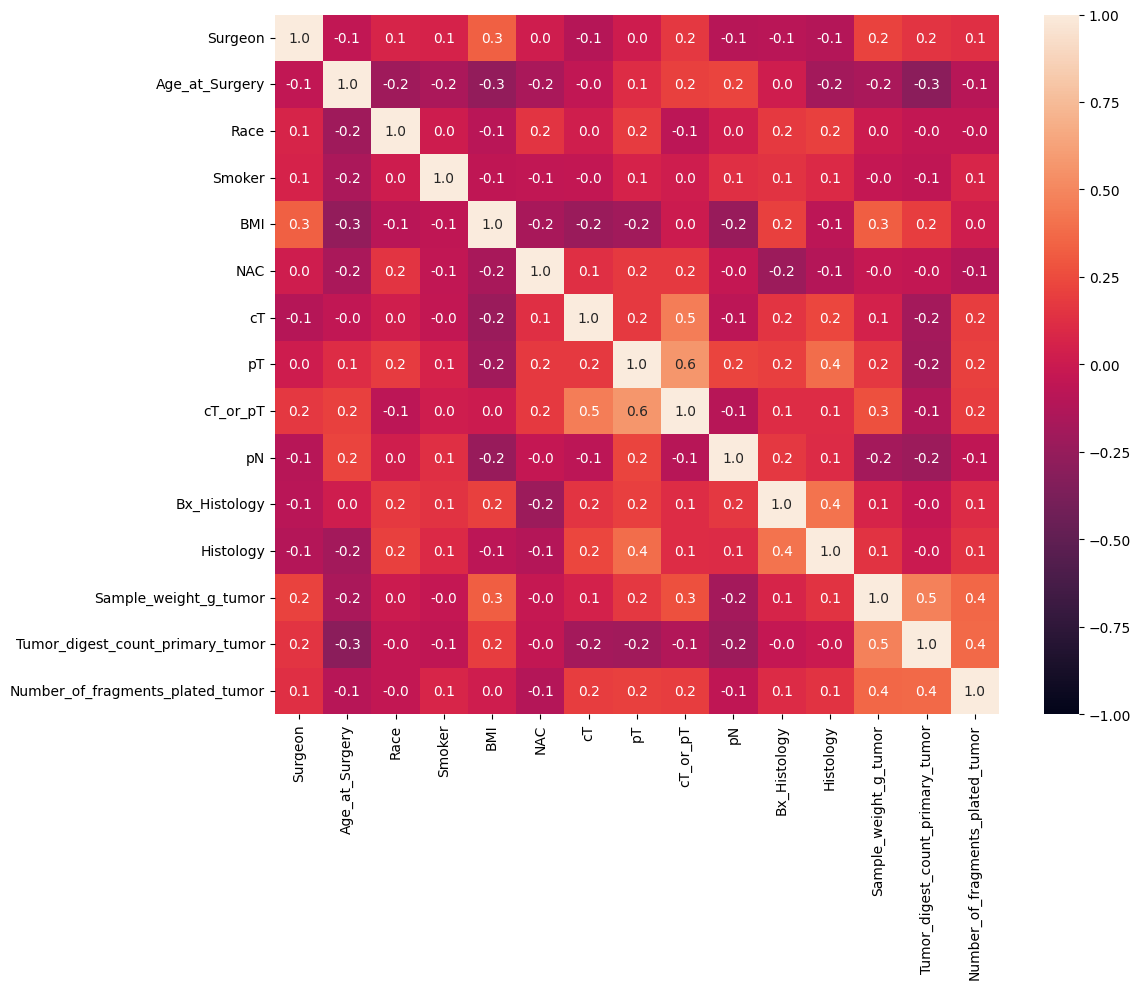

In [23]:
# computing corelation matrix of all features

plt.figure(figsize=(12, 10))
X_cor = ndata_sel.drop('OverallTILGrowth', axis=1)
X_cor = X_cor.drop('ID', axis=1)
X_cor = X_cor.drop('Surgery', axis=1)

# sns.heatmap(X_cor.corr(), annot=True, fmt=".1f")
sns.heatmap(X_cor.corr(), annot=True, fmt=".1f", vmin=-1.0, vmax=1.0)
# plt.title('Correlation (16 - 1 features)')

plt.tight_layout()
savefig('./figs/corr_01')

In [24]:
# Filter all rows which has NaN 

ndata_sel.dropna(inplace=True) # drop rows with Nan, no entries
# ndata_filt = ndata_sel[ndata_sel['OverallTILGrowth'].notna()]


ndata_filt = ndata_sel
print(ndata_filt.shape)

(60, 18)


In [25]:
NoTIL_pred1_idx0 = []
TIL_pred1_idx0 = []

for i in range(ndata_filt.shape[0]):
    if ndata_filt.iloc[i,-1]=='Yes TIL':
        TIL_pred1_idx0.append(ndata_filt.iloc[i,0])
        
for i in range(ndata_filt.shape[0]):
    if ndata_filt.iloc[i,-1]=='No TIL':
        NoTIL_pred1_idx0.append(ndata_filt.iloc[i,0])
        
print(TIL_pred1_idx0)
print(len(TIL_pred1_idx0))
print(' ')

print(NoTIL_pred1_idx0)
len(NoTIL_pred1_idx0)

['B002', 'B003', 'B004', 'B008', 'B013', 'B014', 'B017', 'B018', 'B019', 'B020', 'B024', 'B027', 'B028', 'B030', 'B032', 'B034', 'B035', 'B036', 'B037', 'B038', 'B039', 'B040', 'B041', 'B046', 'B047', 'B050', 'B052', 'B053', 'B054', 'B056', 'B062', 'B064', 'B067', 'B070', 'B083', 'B087', 'B089', 'B091', 'B093', 'B097', 'B099', 'B100', 'B101', 'B102', 'B112', 'B113', 'B120']
47
 
['B001', 'B009', 'B011', 'B012', 'B015', 'B021', 'B023', 'B049', 'B074', 'B078', 'B079', 'B106', 'B118']


13

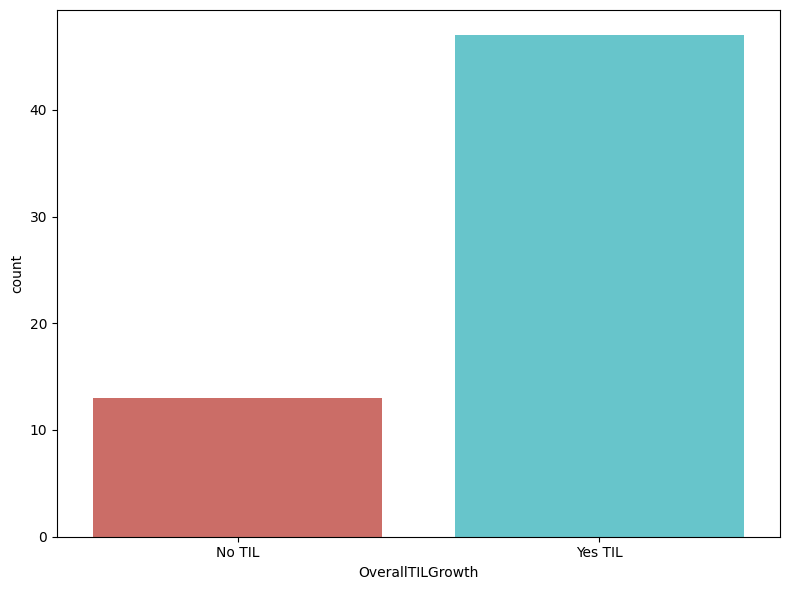

In [26]:
# count class imbalance # data (16 Features)

ndata_filt.OverallTILGrowth.value_counts()/len(ndata_filt.index)

plt.figure(figsize=(8, 6))
sns.countplot(x='OverallTILGrowth',hue='OverallTILGrowth', data=ndata_filt,palette='hls')

plt.tight_layout()
savefig('./figs/distri')
#plt.show()